### Tic Tac Toe

&nbsp;

Tictactoe is a very simple game for children. In a conventional setting, two players play on a three by three grid. Whoever manages to have three marks on a column, row or diagonal wins the game.

The objective here is to make the game as difficult as possible. In another word, the idea is to create a gaming AI which is sophisticated enough to beat the human player. Minimax algorithm is perfect for the job. Minimax, as suggested by the name, is to minimize the maximum loss. Inspired by DFS in graph theory, minimax is a recursive traversal algorithm on game tree. For the player round, it maximizes the AI loss for the player to win. For the AI round, it minimizes the AI loss for the AI to win. It recursively computes the optimal strategy for both player and AI to derive the best move for AI to win.

More details on minimax can be found in the link below

https://sandipanweb.wordpress.com/2017/03/30/using-minimax-without-pruning-to-implement-the-machine-players-to-play-tictactoe-in-computer/

Reference to DFS

https://github.com/je-suis-tm/graph-theory/blob/master/BFS%20DFS%20on%20DCG.ipynb

Reference to recursion

https://github.com/je-suis-tm/recursion-and-dynamic-programming

In [1]:
import copy
import matplotlib.pyplot as plt

### functions

In [2]:
#check if either player has won
def check_win(current_board):
    
    dims=len(current_board)
    player_win=0
    
    #check column and row win
    for i in range(dims):
        if sum(current_board[i])==1*dims:
            player_win=1
            return player_win
        if sum(current_board[i])==-1*dims:
            player_win=-1
            return player_win
        if sum([current_board[j][i] for j in range(dims)])==1*dims:
            player_win=1
            return player_win
        if sum([current_board[j][i] for j in range(dims)])==-1*dims:
            player_win=-1
            return player_win
    
    #check diagonal win
    diag1=[current_board[i][i] for i in range(dims)]
    diag2=[current_board[i][dims-i-1] for i in range(dims)]    
    if sum(diag1)==1*dims:
        player_win=1
        return player_win
    if sum(diag1)==-1*dims:
        player_win=-1
        return player_win
    if sum(diag2)==1*dims:
        player_win=1
        return player_win
    if sum(diag2)==-1*dims:
        player_win=-1
        return player_win
        
    return player_win

In [3]:
#find valid moves
def find_possible_moves(current_board):
    possible_moves=[(i,j) for i in range(len(current_board)) for j in range(len(current_board)) if current_board[i][j]==0]
    return possible_moves

In [4]:
#dfs style traversal on game tree
def minimax(current_board,player_placement,step):

    #find possible moves for tictactoe
    possible_moves=find_possible_moves(current_board)
    
    #initialize
    scores=[] 

    #if terminal state is reached
    #compute score
    if check_win(current_board)!=0:
        return check_win(current_board)
    if len(possible_moves)==0:
        return check_win(current_board)

    #iterate through all possible moves to compute scores
    for move in possible_moves:
        next_status=copy.deepcopy(current_board)
        next_status[move[0]][move[1]]=player_placement
        scores.append(minimax(next_status,-player_placement,step+1))

    #assume the machine is player2 which the placement is one
    #when the machine wins,player_win equals to one
    #its turn is always the maximization
    if player_placement<0:
        return min(scores)
    else:
        return max(scores)

In [5]:
#pick the best move for machine
def find_best_move(current_board,player_placement):
    
    #find possible moves for tictactoe
    possible_moves=find_possible_moves(current_board)
    
    #initialize
    scores=[]
    maxval=-float('inf')
    best_move=None 

    #if terminal state is reached
    #show result
    if len(possible_moves)==0:
        return best_move
            
    #iterate through all possible moves to find the best move    
    for move in possible_moves:
        next_status=copy.deepcopy(current_board)
        next_status[move[0]][move[1]]=player_placement
        score=minimax(next_status,-player_placement,1)
        if score>maxval:
            maxval=score
            best_move=move
            
    return best_move

In [6]:
#show the current state
def display_tictactoe(current_board):    
    
    #map number to text with color
    display_mapping={0:('?','gold'),-1:('O','cyan'),1:('X','red')}
    
    ax=plt.figure(figsize=(5,5)).add_subplot(111)
    
    #plot blocks
    for latitude in range(1,len(current_board)):
        plt.plot([latitude]*(len(current_board)+1),
                [-i for i in range(len(current_board)+1)],c='k')
    for longitude in range(1,len(current_board)):
        plt.plot(range(len(current_board)+1),
                 [-longitude]*(len(current_board)+1),c='k'
                )

    #show answers
    for longitude in range(len(current_board)):
        for latitude in range(len(current_board)):
            plt.text(longitude+0.5,-latitude-0.5,
                     display_mapping[current_board[latitude][longitude]][0],
                     color=display_mapping[current_board[latitude][longitude]][1],
                     ha='center',va='center',fontsize=40)

    plt.axis('off')
    plt.show()

In [7]:
#show result
def check_terminal_state(current_board): 
    stop=False
    result=check_win(current_board)
    if result>0:
        print('\n\nYou lost')
        stop=True
        return stop
    if result<0:
        print('\nYou won')
        stop=True
        return stop
    if len(find_possible_moves(current_board))==0:
        stop=True
        print('\nDraw')        
    return stop

### play tictactoe

In [8]:
#initialize
current_board=[[0,0,0,],
           [0,0,0,],
           [0,0,0,],]

player_placement=-1


~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~
round 0
the current state is

you are o in the board



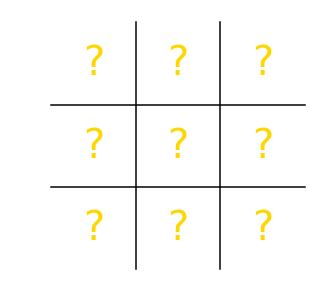


please type next move in zero-index coordinates
e.g. top left corner being 0,0
e.g. bottom right corner being 2,2

your move is 2,1
after your move, the current state is



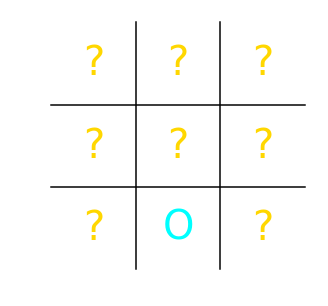


your opponent has moved
its move is 0,1

~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~
round 1
the current state is

you are o in the board



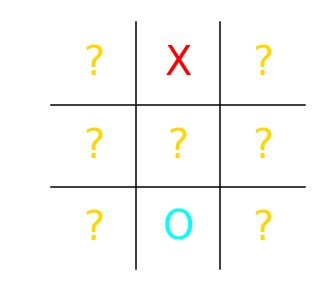


please type next move in zero-index coordinates
e.g. top left corner being 0,0
e.g. bottom right corner being 2,2

your move is 1,1
after your move, the current state is



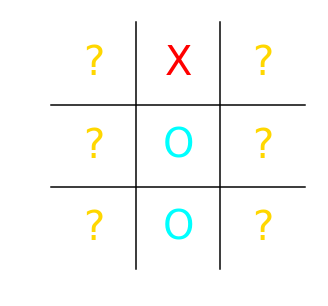


your opponent has moved
its move is 0,0

~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~
round 2
the current state is

you are o in the board



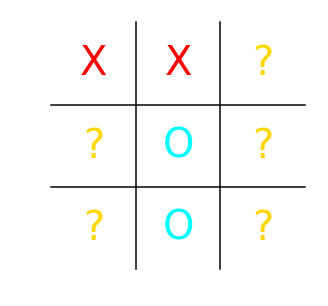


please type next move in zero-index coordinates
e.g. top left corner being 0,0
e.g. bottom right corner being 2,2

your move is 0,2
after your move, the current state is



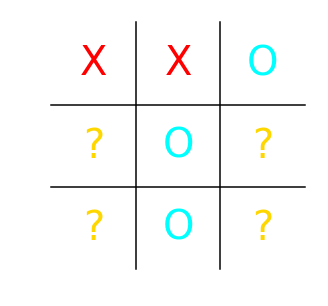


your opponent has moved
its move is 2,0

~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~
round 3
the current state is

you are o in the board



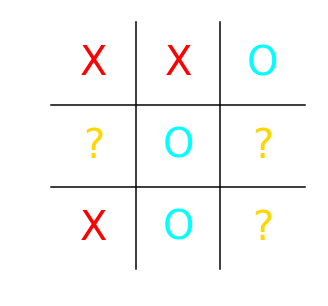


please type next move in zero-index coordinates
e.g. top left corner being 0,0
e.g. bottom right corner being 2,2

your move is 1,0
after your move, the current state is



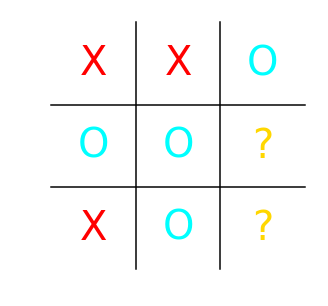


your opponent has moved
its move is 1,2

~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~
round 4
the current state is

you are o in the board



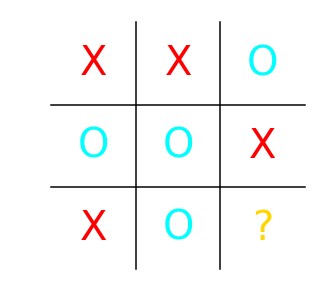


please type next move in zero-index coordinates
e.g. top left corner being 0,0
e.g. bottom right corner being 2,2

your move is 2,2
after your move, the current state is



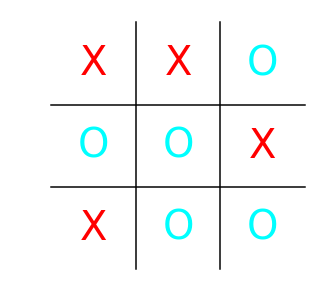


Draw


In [9]:
stop=False
round_counter=0
while not stop:
    
    print('\n~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~')
    print(f'round {round_counter}')
    
    #show status quo
    print("the current state is\n")
    print(f"you are {'o' if player_placement==-1 else 'x'} in the board\n")
    display_tictactoe(current_board)   
        
    #collect user input
    player1_input=input(f"""
please type next move in zero-index coordinates
e.g. top left corner being 0,0
e.g. bottom right corner being {len(current_board)-1},{len(current_board)-1}\n
your move is """)

    #convert to indices and update the board status
    move=tuple(map(int,player1_input.split(',')))
    if current_board[move[0]][move[1]]!=0:
        print("\ninvalid move, you lost\n")
        stop=True
        break
    current_board[move[0]][move[1]]=player_placement
    
    #show user input
    print('after your move, the current state is\n')
    display_tictactoe(current_board)
    
    #show result
    stop=check_terminal_state(current_board)
    if stop:
        break
    
    #use minimax to find the best move
    move=find_best_move(current_board,-player_placement)
    current_board[move[0]][move[1]]=-player_placement
    print(f'\nyour opponent has moved\nits move is {move[0]},{move[1]}')
    
    #show result
    stop=check_terminal_state(current_board)
    if stop:
        display_tictactoe(current_board)
        break
        
    round_counter+=1